In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import math
import pandas as pd
import operator

min: 0.0
max: 2.26772727273
mean: 0.0922487388837892
median: 0.00782608695652
standard deviation: 0.19200514143598535
10% percentile: 0.0
75% percentile: 0.0873913043478


<Container object of 3 artists>

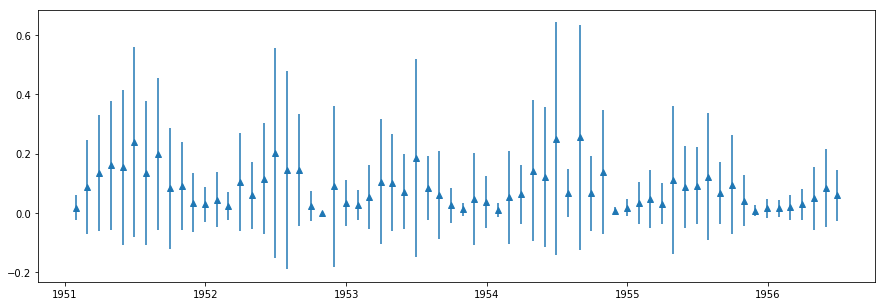

In [5]:
# target data y is a time series data, it has many features which include two features 'time' and 'Mean'.
y = pd.read_csv('work/data/DesMoines.csv')
syear = 1960 #start year
#transfer the feature 'time' to datatime
y.time = pd.to_datetime(y.time,format='%Y%m%d') 

# build a time series which the value is the feature 'Mean', and the index is the feature 'time'
y =pd.Series(y.Mean.values, index=y.time,dtype='float64')

# filter the time series y if it is necessary
#y = y[(y.index.year > syear)&(y.index.month>5) & (y.index.month<9)]#(y.index.year > syear)& &(y.index.month>2) & (y.index.month<12)

#y = y*1000

# print y's statistical properities.
print ('min: '+str(np.min(y)))
print ('max: '+str(np.max(y)))
print ('mean: '+str(np.mean(y)))
print ('median: '+str(np.median(y)))
print ('standard deviation: '+str(np.std(y)))
print ('10% percentile: '+str(np.percentile(y,10)))
print ('75% percentile: '+str(np.percentile(y,75)))

# take the first 2000 days for plot
# get the monthly mean and std
m = y.head(2000).resample('M').mean()
st = y.head(2000).resample('M').std()

# plot the mean, std errorbar plot
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.errorbar(m.index, m.values, st.values, linestyle='None', marker='^')

In [6]:
def distribution_plot(y,omax,omin,ymax,ymin):
    bins = np.linspace(np.min(y), np.max(y), 50)
    fig = plt.figure()
    fig.set_size_inches(15, 10)
    
    # density = True means you want the normalized plot. If you want to make the distribution pdf plot and histogram in the same scale, you should set density=True 
    n, bins, patches = plt.hist(y, bins, alpha=0.5, density=True, facecolor='g') #log=True

    # all the distributions
    #dist_names = ['alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']
    dist_names = ['gumbel_l','logistic','norm','alpha','cauchy', 'laplace' ]
    dic = {}
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        pdf_fitted = dist.pdf(bins, *param[:-2], loc=param[-2], scale=param[-1])       
        NLL = -np.sum(np.log(pdf_fitted))
        print ("Dist: {0}, NLL: {1}".format(dist_name, NLL))
        dic[dist_name]=NLL
        plt.plot(bins, pdf_fitted, label=dist_name+', NLL: '+str(NLL))
    # sorted the fitted distributions by their NLL
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
    print (sorted_dic)
    
    #set the x lim and y lim in plot if you want to set them
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.legend(loc='upper right')
    plt.xlabel('Daily Precipitation')
    plt.ylabel('Number of Days')
    plt.show()
    return sorted_dic

Dist: gumbel_l, NLL: 2243.25632171
Dist: logistic, NLL: 607.11817981
Dist: norm, NLL: 1001.65705188
Dist: alpha, NLL: 251.271360317
Dist: cauchy, NLL: 279.098060943
Dist: laplace, NLL: 531.560381958
[('alpha', 251.27136031712797), ('cauchy', 279.09806094319), ('laplace', 531.5603819581854), ('logistic', 607.1181798099342), ('norm', 1001.6570518829702), ('gumbel_l', 2243.2563217073584)]


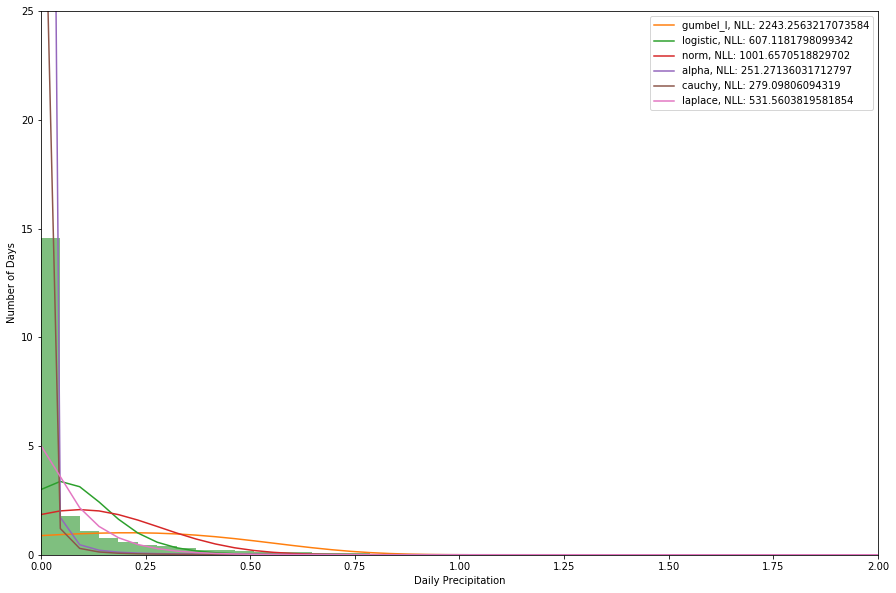

In [7]:
ymax,ymin = 25,0
xmax,xmin = 2,0
data = y #np.log(1+y)
sorted_dic = distribution_plot(data,xmax,xmin,ymax,ymin)